In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 10 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [53]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
#z = np.linspace(zmin, zmax, nobs, endpoint=True)
z = np.zeros( len(x) )
#for i in range( len(x) ):
#    z[i] = random.uniform(0.0, -10.0)  

print(x[1]-x[0])

11.11111111111111


In [54]:
# localizacao do primeiro prisma em funcao da posicao de observacao (1 prisma por observacao):
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.555555555555555


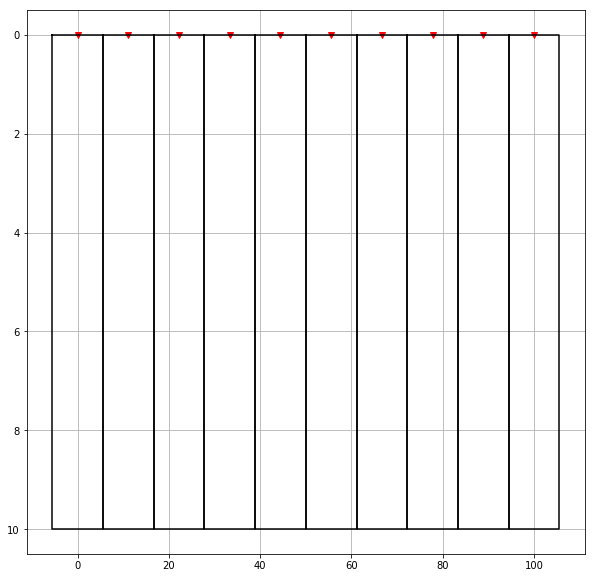

In [55]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
#plt.ylim(zmin, zmax + 10)
plt.gca().invert_yaxis()
plt.show()

# Observação: Os triângulos vermelhos consideram o relevo que virá a ser adicionado mais a frente

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [56]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
p = np.linspace(2.0, 20.0, len(x), endpoint=True )
print( p )

[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [57]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(0.0, 30.0) 
print( cden )

[21.90129755  0.44411877  9.06558671 25.75968837 15.98398107 21.56408175
 22.5106678   4.17665286 29.26334324 24.8392002 ]


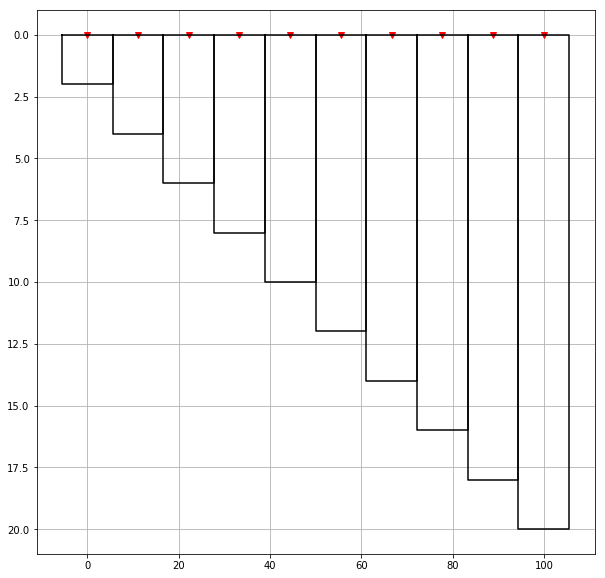

In [58]:
x_coord, z_coord = plots_rectangles(x, z, p, color='black', paint=False, var=None, name=None, repeat=False)

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

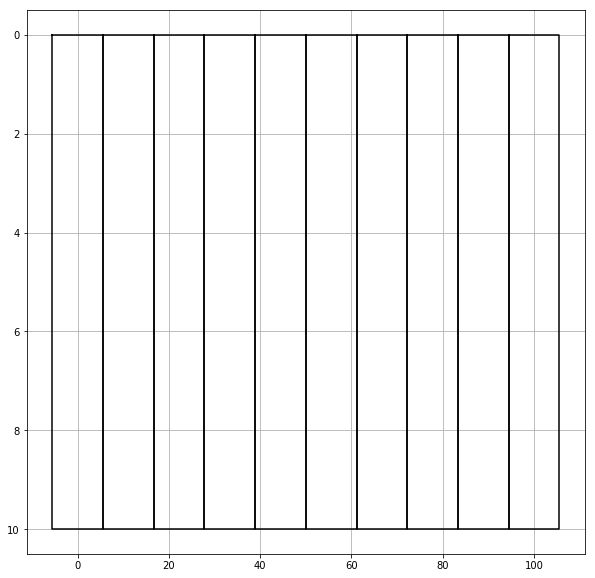

In [11]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

i = 0 => [13.24696728 29.04334185  9.58691472  0.59682963  6.94511833]
i = 1 => [ 3.12914137  0.41599334  7.72768129 23.01258799  7.09075151]
i = 2 => [19.61453223 18.01448246 24.67401333 29.30712327 15.82971694]
i = 3 => [16.69235035  4.51158712 26.40252744 14.68140684 22.80088137]
i = 4 => [25.38261086 13.98453945 20.04571702 23.28416005  2.15377964]
i = 5 => [ 8.44864024 29.41084828 16.59689606 10.37132615 21.23801491]
i = 6 => [23.2994666  21.88015389 11.77774754 17.88768744 29.60664969]
i = 7 => [17.83315665 23.30721361  3.3138388  11.42001439 15.29730977]
i = 8 => [ 7.1023416  25.81863662 16.95997673 20.80238372 15.45994158]
i = 9 => [17.082278   21.17636809 28.72422846  3.92852049 28.83740625]


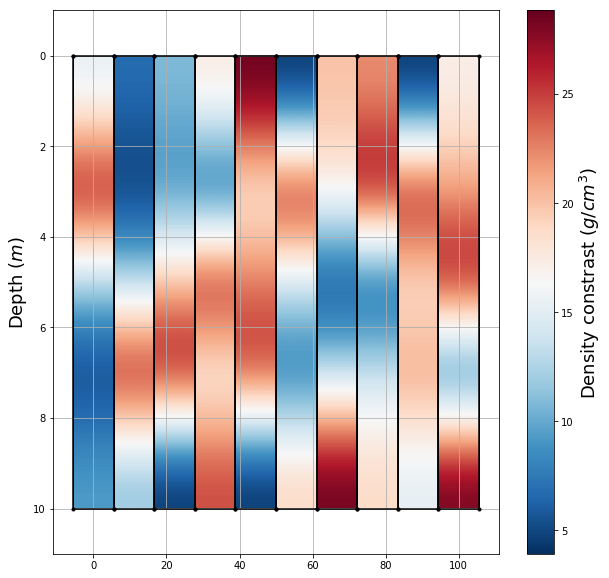

In [35]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7
rho0 = 2.78

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ):
        zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    ################# ESSA PARTE DESSE DEVE SER RETIRADA QUANDO A TAREFA ATUAL FOR CONCLUÍDA #####################
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0:   
        lista0 = np.copy(cden)
    elif i == 1:   
        lista1 = np.copy(cden)
    elif i == 2:
        lista2 = np.copy(cden)
    elif i == 3: 
        lista3 = np.copy(cden)
    elif i == 4:
        lista4 = np.copy(cden)
    elif i == 5:
        lista5 = np.copy(cden)
    elif i == 6:
        lista6 = np.copy(cden)
    elif i == 7:
        lista7 = np.copy(cden)
    elif i == 8:
        lista8 = np.copy(cden)
    elif i == 9:
        lista9 = np.copy(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 9 => [17.082278   21.17636809 28.72422846  3.92852049 28.83740625]


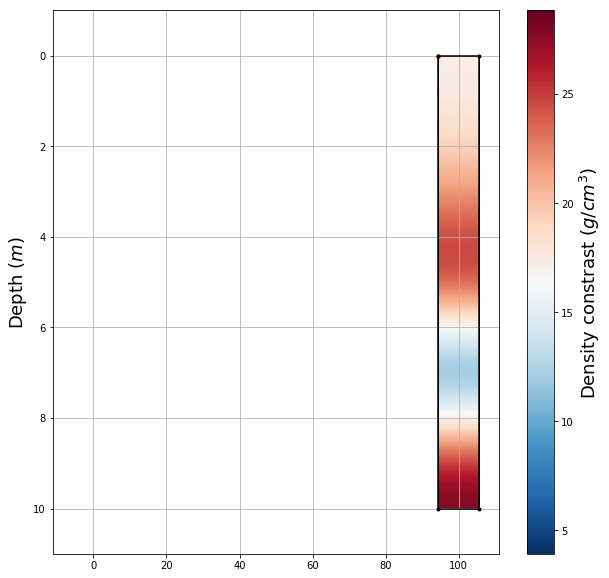

In [36]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 9 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista9) # alterar o que está dentro de np.array para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
# plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [25.360756236554085, 28.82191895537103, 19.50441343755341, 21.107110333393962, 29.523259034336807]
i = 1 => [18.749828580626705, 13.161380454874847, 17.32977734821745, 4.474308749624977, 13.389166768979837]
i = 2 => [26.085067083315682, 16.624894996608734, 4.216039917610339, 4.425842692040347, 28.940697594992134]
i = 3 => [19.74452905667276, 23.506574677456015, 9.583363409583793, 6.748909415837781, 22.471933339724604]
i = 4 => [15.06955786281438, 7.309469424816846, 24.297574687184305, 6.241042945253852, 9.028027574840216]
i = 5 => [7.382882256737966, 12.621732407265048, 13.017849271969231, 0.3906051477034578, 9.063527141221371]
i = 6 => [26.038023108640157, 11.513971877094447, 5.675436544025723, 5.578676913593413, 23.795479219578667]
i = 7 => [8.219263199667411, 0.5026437088226998, 9.233309350210847, 15.24875251105975, 10.969699328163037]
i = 8 => [5.078607513807087, 27.260065045966257, 4.810257564857841, 2.725967604226379, 12.864192775827636]
i = 9 => [23.04895788917475, 13.5

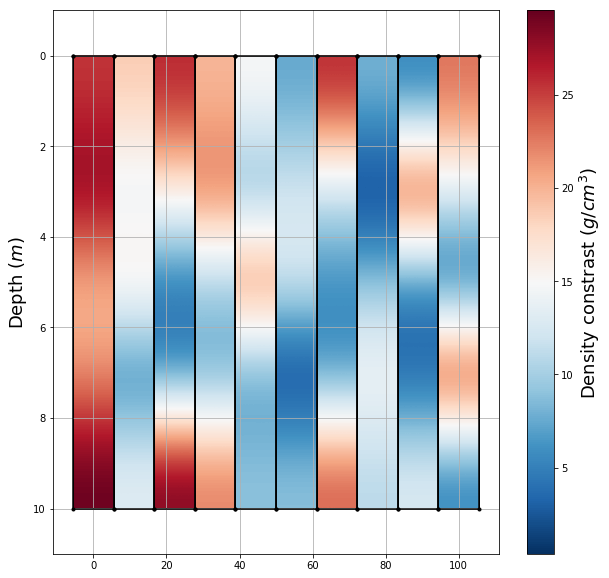

In [40]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    for j in range( len(xp) ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    ################# ESSA PARTE DESSE DEVE SER RETIRADA QUANDO A TAREFA ATUAL FOR CONCLUÍDA #####################
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

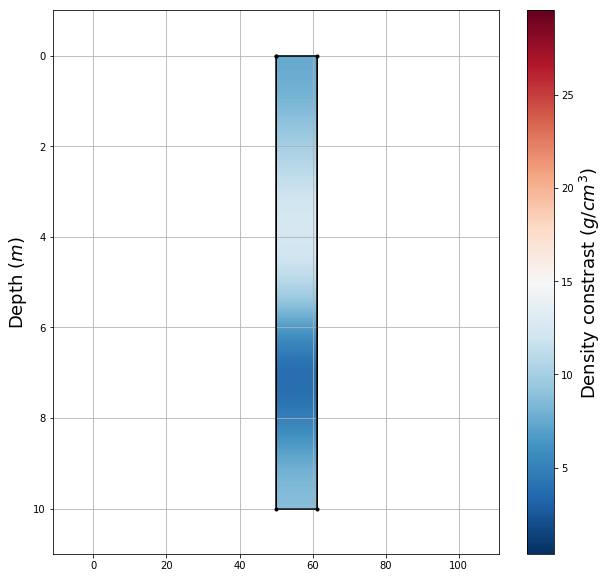

In [41]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

# plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [1.5772265958269283, 0.9893837989622523, 25.02786942453504, 11.107412835546986, 13.094905264666533]
i = 1 => [7.756943192765922, 25.513030329264435, 22.19473437251277, 29.46652484945945, 9.539491704756294]
i = 2 => [21.5347168031148, 22.84434178112889, 11.82159821410355, 23.98233713408315, 16.983480811346155]
i = 3 => [22.328516217856386, 26.8788665640361, 16.85455482492645, 0.5842976235696817, 19.9653597696907]
i = 4 => [10.840048256103755, 1.3434852838726918, 24.62289639626684, 29.807977835853336, 10.890478963722929]
i = 5 => [21.078770897988644, 10.435431755708356, 16.481936284211734, 19.357384717672392, 12.175532806746238]
i = 6 => [23.564044073142057, 21.65955736278449, 15.552133776776175, 16.47938677895038, 14.93343720480021]
i = 7 => [19.978302836563042, 25.084926948846228, 17.41718973569566, 18.93568824131003, 7.278636384775864]
i = 8 => [24.950834328556894, 15.134279378919963, 14.465304195793747, 19.688014349219912, 23.79857949600511]
i = 9 => [6.234084431645125, 2.06

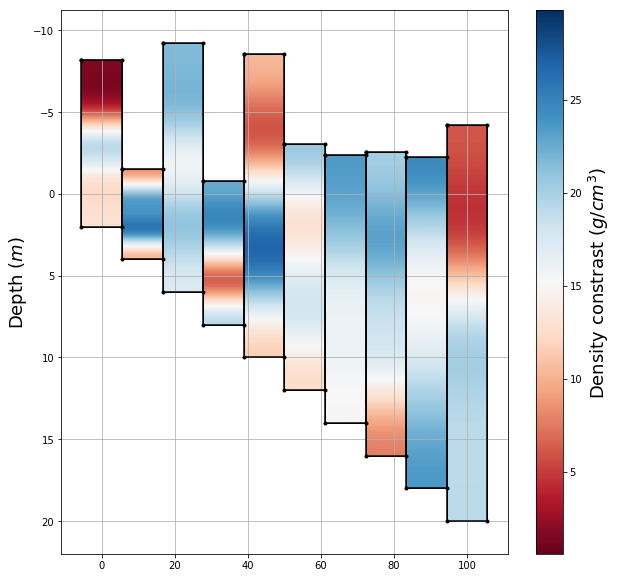

In [42]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    if z[i] < 0:
        plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             ( z[i], z[i], 0 + p[i] , 0 + p[i], z[i] ), 'k.-')
        zp = np.array([ z[i], z[i], 0 + p[i] , 0 + p[i], z[i] ])
        if i == 0:
            zmin2 = z[i] 
            zmax2 = 0 + p[i]
        else:
            if 0 + p[i]  > zmax2:
                zmax2 = 0 + p[i]
            if z[i]  < zmin2:
                zmin2 = z[i] 
    else:
        plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             ( z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ), 'k.-')
        zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
        if i == 0:
            zmin2 = z[i] 
            zmax2 = z[i] + p[i]
        else:
            if z[i] + p[i]  > zmax2:
                zmax2 = z[i] + p[i]
            if z[i]  < zmin2:
                zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_rectangles para que além de plotar retângulos de forma que representem o ambiente com uma certa fidelidade, também pinte os retângulos de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

i = 0 => [1.5772265958269283, 0.9893837989622523, 25.02786942453504, 11.107412835546986, 13.094905264666533]
i = 1 => [7.756943192765922, 25.513030329264435, 22.19473437251277, 29.46652484945945, 9.539491704756294]
i = 2 => [21.5347168031148, 22.84434178112889, 11.82159821410355, 23.98233713408315, 16.983480811346155]
i = 3 => [22.328516217856386, 26.8788665640361, 16.85455482492645, 0.5842976235696817, 19.9653597696907]
i = 4 => [10.840048256103755, 1.3434852838726918, 24.62289639626684, 29.807977835853336, 10.890478963722929]
i = 5 => [21.078770897988644, 10.435431755708356, 16.481936284211734, 19.357384717672392, 12.175532806746238]
i = 6 => [23.564044073142057, 21.65955736278449, 15.552133776776175, 16.47938677895038, 14.93343720480021]
i = 7 => [19.978302836563042, 25.084926948846228, 17.41718973569566, 18.93568824131003, 7.278636384775864]
i = 8 => [24.950834328556894, 15.134279378919963, 14.465304195793747, 19.688014349219912, 23.79857949600511]
i = 9 => [6.234084431645125, 2.06

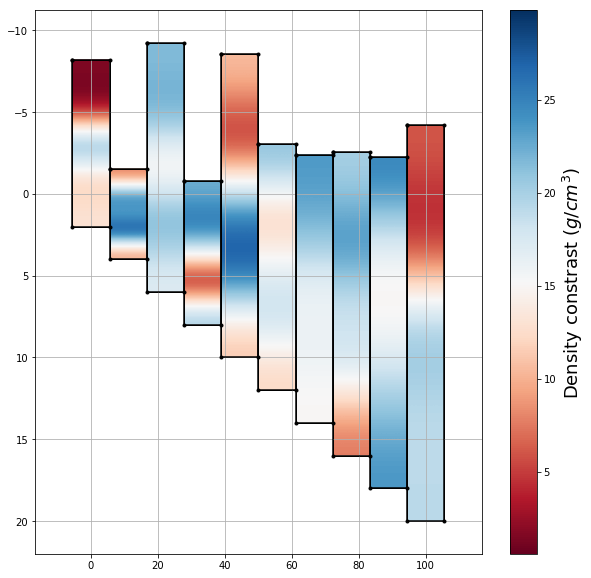

In [46]:
# Caso em que a propriedade ou grandeza física varia para cada retângulo
x_coord, z_coord = plots_rectangles(x, z, p, paint=True, var=cden, name='Density constrast $(g/cm^3)$', repeat=False)

i = 0 => [1, 1, 1, 1, 1]
i = 1 => [2, 2, 2, 2, 2]
i = 2 => [3, 3, 3, 3, 3]
i = 3 => [4, 4, 4, 4, 4]
i = 4 => [5, 5, 5, 5, 5]
i = 5 => [6, 6, 6, 6, 6]
i = 6 => [7, 7, 7, 7, 7]
i = 7 => [8, 8, 8, 8, 8]
i = 8 => [9, 9, 9, 9, 9]
i = 9 => [10, 10, 10, 10, 10]


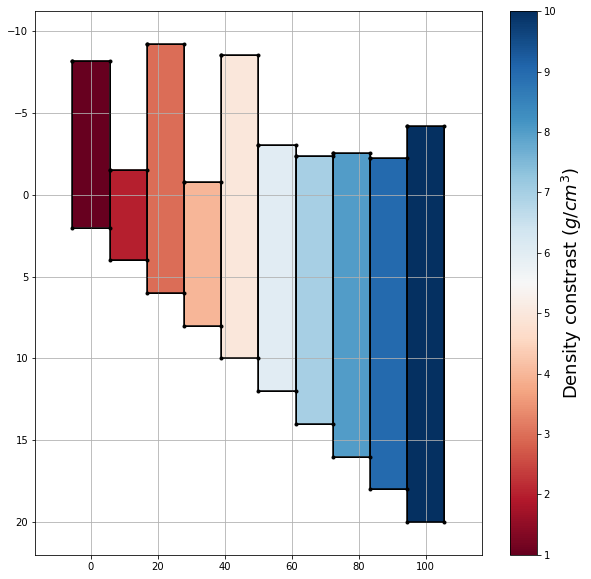

In [47]:
# Caso em que a propriedade ou grandeza física é constante para cada retângulo
teste = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
x_coord, z_coord = plots_rectangles(x, z, p, paint=True, var=teste, name='Density constrast $(g/cm^3)$', repeat=True)

# Dúvidas:
> (1) Perguntar sobre o p. De acordo com a descrição na função, ele é a diferença entre o topo e a base do retangulo. Mas, ele foi usado como se fosse a difença entre a base do retângulo e uma linha de referência que foi o z = 0. O que seria o certo? (OK) <br>
> (2) Perguntar sobre o reconhecimento da variável de uma função dentro da outra (OK)

In [30]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [33]:
for i,j in enumerate(A):
    print(i)

0
1


## TODO:
> Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores):
> A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas.